<a href="https://colab.research.google.com/github/LETIMEI/LeetCode_SQL/blob/main/Lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Processing

In [1]:
import pandas as pd
import re
import nltk

In [2]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

# Download extra packages

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Read the file

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/RDGopal/IB9CW0-Text-Analytics/main/Data/sms_spam.csv')

In [53]:
df

,type,text,tokens,text1
0,ham,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,...",free entry wkly comp win fa cup final tkts may...
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, think, go, usf, life, around, though]",nah think go usf life around though
...,...,...,...,...
5569,spam,this is the 2nd time we have tried 2 contact u...,"[time, tried, contact, u, pound, prize, claim,...",time tried contact u pound prize claim easy ca...
5570,ham,will ã¼ b going to esplanade fr home?,"[b, going, esplanade, fr, home]",b going esplanade fr home
5571,ham,"pity, * was in mood for that. so...any other s...","[pity, mood, suggestion]",pity mood suggestion
5572,ham,the guy did some bitching but i acted like i'd...,"[guy, bitching, acted, like, interested, buyin...",guy bitching acted like interested buying some...


# Accessing files from Github

In [45]:
import requests

def list_github_directory(user, repo, path):
    url = f"https://api.github.com/repos/{user}/{repo}/contents/{path}"
    response = requests.get(url)
    if response.status_code == 200:
        content = response.json()
        return [file['name'] for file in content if file['type'] == 'file']
    else:
        print("Failed to retrieve data:", response.status_code)
        return []

# Usage
user = 'RDGopal'
repo = 'IB9CW0-Text-Analytics'
path = 'Data'
files = list_github_directory(user, repo, path)
print("Files in the Data folder:", files)


Files in the Data folder: ['26k-consumer-complaints.csv', 'Headlines_5000.csv', 'Kickstarter.csv', 'Machine_stops.pdf', 'Reviews.csv', 'Roomba.csv', 'Tweets.csv', 'disaster_tweets.csv', 'docAI.pdf', 'fakenews.csv', 'financial_news.csv', 'imdb.csv', 'oct_delta.csv', 'pyschology.csv', 'sms_spam.csv', 'tinyshakespeare.txt']


# Data Preprocessing

In [46]:
# Lowercase (make everything in text column lowercase)
df['text'] = df['text'].str.lower()

In [47]:
# Tokenize (apply tokenize function, adding a 'tokens' column)
df['tokens'] = df['text'].apply(nltk.word_tokenize)

In [48]:
# get stopwords
stop_words = stopwords.words('english') # a list of typical stop words in english
extra_words = ['.','*',','] # add a some user-defined stop words
stop_words.extend(extra_words) # combine them together

In [12]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
# Remove stopwords
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words and token.isalpha()])

In [15]:
# Create a PorterStemmer object
# Different forms of the same word are usually problematic
# Stemming is a process of transforming a word into its stem (normalized form)

stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

Typically Lemmatizing is better than Stemming. Only pick one from stemming and lemmatizing.

In [50]:
# Lemmatize
# considers the root form of the word and group those with similar forms together
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])


In [51]:
# Combine tokens back into a cleaned review
df['text1'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

In [52]:
df[['text','text1']]

,text,text1
0,"go until jurong point, crazy.. available only ...",go jurong point crazy available bugis n great ...
1,ok lar... joking wif u oni...,ok lar joking wif u oni
2,free entry in 2 a wkly comp to win fa cup fina...,free entry wkly comp win fa cup final tkts may...
3,u dun say so early hor... u c already then say...,u dun say early hor u c already say
4,"nah i don't think he goes to usf, he lives aro...",nah think go usf life around though
...,...,...
5569,this is the 2nd time we have tried 2 contact u...,time tried contact u pound prize claim easy ca...
5570,will ã¼ b going to esplanade fr home?,b going esplanade fr home
5571,"pity, * was in mood for that. so...any other s...",pity mood suggestion
5572,the guy did some bitching but i acted like i'd...,guy bitching acted like interested buying some...


In [31]:
# Put it all into a function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = stopwords.words('english')
    extra_words = ['.','*',',']
    stop_words.extend(extra_words)
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

In [39]:

df['tokens'] = df['text'].apply(preprocess_text)

#  Your Turn
Read and preprocess the file `oct_delta.csv`

# Bag-of-Words and tf-idf

In [34]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel,CoherenceModel,TfidfModel,Nmf,LsiModel

In [54]:
# create list of tokens
documents = df['tokens'].tolist()

In [55]:
documents

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'c',
  'apply'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'network',
  'customer',
  'sele

In [56]:
# create the dictionary
# notice that only a list [] can be converted into a dictionary
dictionary = Dictionary(documents) # list of lists (documents)

In [57]:
# Optional if want to see the dictionary
dictionary.save_as_text('testxyz.csv',sort_by_word=True)

Filter extremity from the dictionary we have.

In [58]:
# filter extremes from the dictionary (optional, but recommended)
dictionary.filter_extremes(no_below=5, no_above=0.5) # at least appears in 5 documents, no more than 50%

In [59]:
# create bag-of-words representation
corpus = [dictionary.doc2bow(document) for document in documents]

In [61]:
df

,type,text,tokens,text1
0,ham,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,...",free entry wkly comp win fa cup final tkts may...
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, think, go, usf, life, around, though]",nah think go usf life around though
...,...,...,...,...
5569,spam,this is the 2nd time we have tried 2 contact u...,"[time, tried, contact, u, pound, prize, claim,...",time tried contact u pound prize claim easy ca...
5570,ham,will ã¼ b going to esplanade fr home?,"[b, going, esplanade, fr, home]",b going esplanade fr home
5571,ham,"pity, * was in mood for that. so...any other s...","[pity, mood, suggestion]",pity mood suggestion
5572,ham,the guy did some bitching but i acted like i'd...,"[guy, bitching, acted, like, interested, buyin...",guy bitching acted like interested buying some...


In [60]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)],
 [(13, 1), (14, 1), (15, 1), (16, 1), (17, 1)],
 [(18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 2),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1)],
 [(16, 2), (19, 1), (34, 1), (35, 1), (36, 1), (37, 2)],
 [(5, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1)],
 [(15, 1),
  (29, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1)],
 [(49, 2), (55, 1), (56, 1), (57, 1), (58, 1)],
 [(59, 1), (60, 2), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)],
 [(67, 1),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1)],
 [(16, 1),
  (24, 2),
  (67, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 3),
  (85, 1),
  (86, 1)

In [62]:
# create tf-idf representation
tfidf_model = TfidfModel(corpus)
tfidf_corpus = [tfidf_model[doc] for doc in corpus]

In [63]:
tfidf_corpus

[[(0, 0.31494611360689),
  (1, 0.36318870692863875),
  (2, 0.36318870692863875),
  (3, 0.3255023583025232),
  (4, 0.23571577697809895),
  (5, 0.16090456397523703),
  (6, 0.17100582770388614),
  (7, 0.21492638813758094),
  (8, 0.36318870692863875),
  (9, 0.20690939667085692),
  (10, 0.2788828678488733),
  (11, 0.21752831561927713),
  (12, 0.27266238754995953)],
 [(13, 0.6502621731540983),
  (14, 0.4647708792014146),
  (15, 0.28957968676798845),
  (16, 0.17267022825406037),
  (17, 0.4974693290015957)],
 [(18, 0.2302376593642046),
  (19, 0.16032007736561343),
  (20, 0.2761838937009087),
  (21, 0.2850827785548839),
  (22, 0.49501750343665507),
  (23, 0.25434467335992816),
  (24, 0.1421427831192402),
  (25, 0.20993472488177117),
  (26, 0.22746514962368167),
  (27, 0.2261412987195566),
  (28, 0.2261412987195566),
  (29, 0.2850827785548839),
  (30, 0.14868534727252686),
  (31, 0.1577361011514087),
  (32, 0.19225678828016354),
  (33, 0.2654893906005988)],
 [(16, 0.3004144271153336),
  (19, 0.2

# Frequency Analysis

In [64]:
!pip install matplotlib wordcloud


To perform frequency analysis, we need to count how often each word appears in your corpus. We can utilize the dictionary and the Bag-of-Words (BoW) corpus

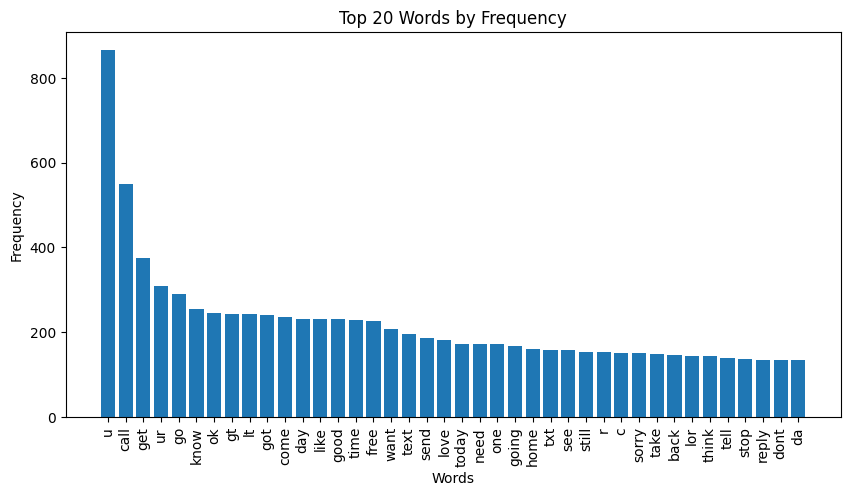

In [65]:
from collections import Counter
import matplotlib.pyplot as plt

# Summing up the counts from the BoW corpus
total_word_count = Counter(word_id for document in corpus for word_id, count in document)

# Mapping back the word IDs to words
mapped_word_counts = [(dictionary[word_id], count) for word_id, count in total_word_count.items()]

# Sort words by frequency
sorted_word_counts = sorted(mapped_word_counts, key=lambda w: w[1], reverse=True)

# Let's plot the top words
plt.figure(figsize=(10, 5))
words, counts = zip(*sorted_word_counts[:40])
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words by Frequency')
plt.xticks(rotation=90)
plt.show()


# Creating a Word Cloud
To create a word cloud, you will need the frequencies in a dictionary format, where the keys are words and the values are their frequencies.

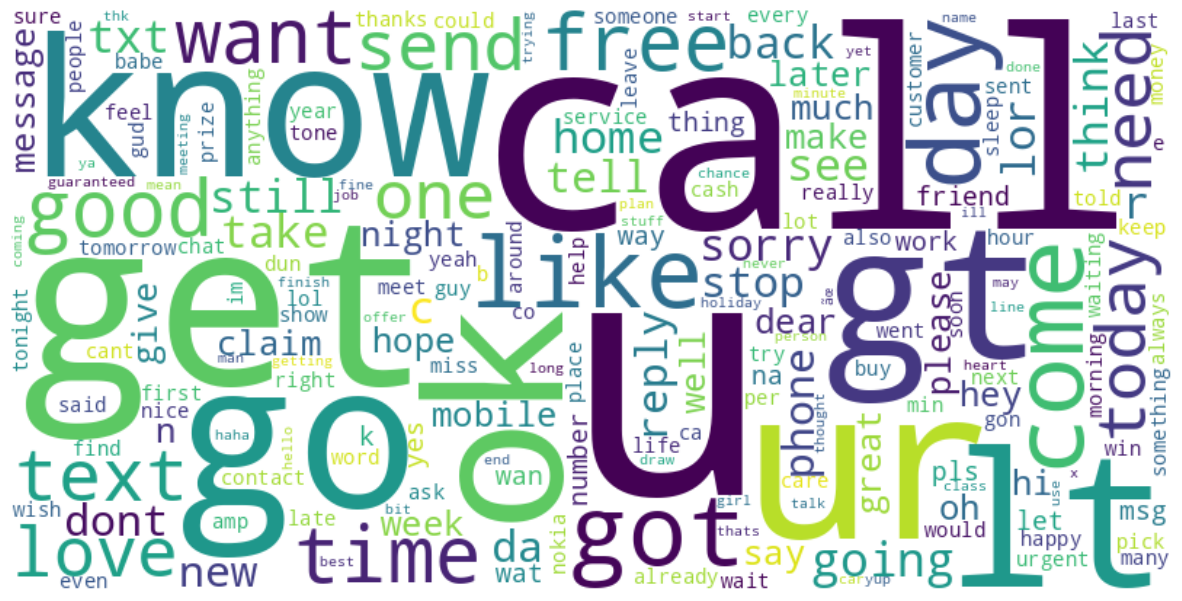

In [66]:
from wordcloud import WordCloud

# Creating a dictionary for word cloud
word_freq_dict = dict(sorted_word_counts)

# Creating word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_freq_dict)

# Displaying the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


# Your Turn
Conduct frequency analysis with `oct_delta.csv` file.

# Tiny Shakespeare novel

### Read the file locally

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the text file
with open('/content/tinyshakespeare.txt', 'r') as file:
    text = file.read().lower()

# Tokenize the text
tokens = word_tokenize(text)


### Or Read the file from GitHub

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

import requests

# URL to the raw text file on GitHub
url = 'https://raw.githubusercontent.com/RDGopal/IB9CW0-Text-Analytics/main/Data/tinyshakespeare.txt'

# Use requests to get the content of the file
response = requests.get(url)

# Ensure the request was successful
if response.status_code == 200:
    text = response.text.lower()
    # Continue processing the text as needed
else:
    print("Failed to retrieve the file. Status code:", response.status_code)

# Tokenize the text
tokens = word_tokenize(text)

In [ ]:
len(tokens)

## Zipf's Law

Zipf's Law is an empirical law that suggests the frequency of a word in a natural language text is inversely proportional to its rank in the frequency table. To test Zipf's Law with your tokenized text data, we follow the steps below:

1. **Calculate Word Frequencies**: Count how often each word appears in your tokenized text.

2. **Sort Words by Frequency**: Rank the words by their frequency in descending order.

3. **Plot the Frequencies**: Plot the frequency of each word against its rank on a log-log plot.

4. **Analyze the Plot**: Zipf's Law predicts a linear relationship on a log-log plot with a slope of approximately -1.


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Count frequencies
word_counts = Counter(tokens)

# Sort words by frequency
sorted_word_counts = word_counts.most_common()

# Prepare data for plotting
ranks = range(1, len(sorted_word_counts) + 1)
frequencies = [freq for _, freq in sorted_word_counts]

# Log-log plot
plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies, marker="o")
plt.title('Zipf\'s Law')
plt.xlabel('Rank of the word')
plt.ylabel('Frequency of the word')
plt.grid(True)
plt.show()


In [ ]:
# Get English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from tokens
filtered_tokens = [token for token in tokens if token not in stop_words and token.isalpha()]


In [ ]:
len(filtered_tokens)

In [ ]:
from collections import Counter

# Count word frequencies
word_counts = Counter(filtered_tokens)


In [ ]:
word_counts

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Get the 20 most common words
most_common_words = word_counts.most_common(20)

# Unpack the words and their frequencies
words, frequencies = zip(*most_common_words)

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)  # Rotate the words on x-axis to avoid overlapping
plt.show()


# Your Turn
Run the following code to get a novel from HugginFace and conduct Zipf's law analysis.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

import requests

# URL to the raw text file on GitHub
url ="https://datasets-server.huggingface.co/rows?dataset=JiggaBooJombs%2FNovelist&config=default&split=train&offset=0&length=100"

# Use requests to get the content of the file
response = requests.get(url)

# Ensure the request was successful
if response.status_code == 200:
    text = response.text.lower()
    # Continue processing the text as needed
else:
    print("Failed to retrieve the file. Status code:", response.status_code)

# Tokenize the text
tokens = word_tokenize(text)

# POS Tagging

In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

In [ ]:


# POS tagging the filtered tokens
pos_tags = nltk.pos_tag(filtered_tokens)

# Count word frequencies (including the POS tags for uniqueness)
word_counts = Counter(pos_tags)

# Create a list of dictionaries to later convert to a DataFrame
data = [{'Word': word, 'POS': pos, 'WordCount': count} for (word, pos), count in word_counts.items()]

# Create the DataFrame
df_pos = pd.DataFrame(data)

# Display the first few rows of the DataFrame to verify
print(df_pos.head())

## Create POS mapping

In [ ]:
pos_tag_full_form = {
    'CC': 'Coordinating conjunction',
    'CD': 'Cardinal number',
    'DT': 'Determiner',
    'EX': 'Existential there',
    'FW': 'Foreign word',
    'IN': 'Preposition or subordinating conjunction',
    'JJ': 'Adjective',
    'JJR': 'Adjective, comparative',
    'JJS': 'Adjective, superlative',
    'LS': 'List item marker',
    'MD': 'Modal',
    'NN': 'Noun, singular or mass',
    'NNS': 'Noun, plural',
    'NNP': 'Proper noun, singular',
    'NNPS': 'Proper noun, plural',
    'PDT': 'Predeterminer',
    'POS': 'Possessive ending',
    'PRP': 'Personal pronoun',
    'PRP$': 'Possessive pronoun',
    'RB': 'Adverb',
    'RBR': 'Adverb, comparative',
    'RBS': 'Adverb, superlative',
    'RP': 'Particle',
    'SYM': 'Symbol',
    'TO': 'to',
    'UH': 'Interjection',
    'VB': 'Verb, base form',
    'VBD': 'Verb, past tense',
    'VBG': 'Verb, gerund or present participle',
    'VBN': 'Verb, past participle',
    'VBP': 'Verb, non-3rd person singular present',
    'VBZ': 'Verb, 3rd person singular present',
    'WDT': 'Wh-determiner',
    'WP': 'Wh-pronoun',
    'WP$': 'Possessive wh-pronoun',
    'WRB': 'Wh-adverb'
}


In [ ]:
df_pos['POS Full Form'] = df_pos['POS'].map(pos_tag_full_form)

# Display the DataFrame with the new column
print(df_pos.head())

In [ ]:
# Count total occurrences of words for each POS tag
pos_total_counts = df_pos.groupby('POS').size()

# Display the total occurrences of words for each POS tag
print(pos_total_counts)

# Your Turn
Conduct POS analysis for `sms_spam.csv` and `oct_delta.csv` data.